In [ ]:
import numpy as np
import pandas as pd
import itertools

from sklearn import datasets
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from mlxtend.plotting import plot_decision_regions
from mlxtend.preprocessing import shuffle_arrays_unison
import seaborn as sns


from sklearn.svm import SVC

from sklearn.metrics import accuracy_score

**AGGregation**

In [ ]:
agg = "Aggregation.txt"
df = pd.read_csv(agg, sep='\t', skiprows=7, header=None)
df

0      1  2
0    15.55  28.65  2
1    14.90  27.55  2
2    14.45  28.35  2
3    14.15  28.80  2
4    13.75  28.05  2
..     ...    ... ..
783   7.80   3.35  5
784   8.05   2.75  5
785   8.50   3.25  5
786   8.10   3.55  5
787   8.15   4.00  5

[788 rows x 3 columns]

In [ ]:
df.shape

(788, 3)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 788 entries, 0 to 787
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       788 non-null    float64
 1   1       788 non-null    float64
 2   2       788 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 18.6 KB


In [ ]:
df.isnull().sum()

0    0
1    0
2    0
dtype: int64

In [ ]:
df.duplicated().sum()

0

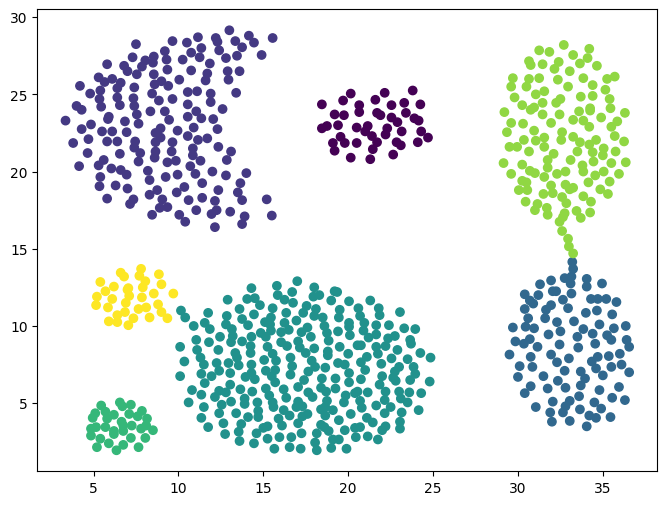

In [ ]:
fig,ax=plt.subplots(figsize=(8, 6))
plt.scatter(df[0], df[1], c = df[2])

In [ ]:
X, y= df[[0,1]], df[2]

X, y = shuffle_arrays_unison(arrays=[np.asarray(X), np.asarray(y).astype(int)], random_seed=42)

scaler = StandardScaler()
scaler.fit(X)

X = scaler.transform(X)
X_train, y_train = X[:100], y[:100]
X_test, y_test = X[100:], y[100:]

In [ ]:
svm = SVC(C=100000, kernel='linear')
classifier=svm.fit(X_train, y_train)

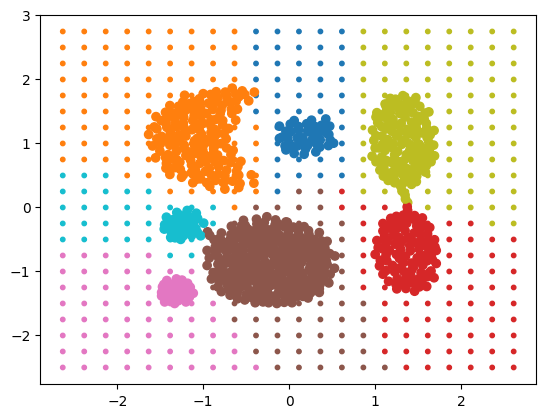

In [ ]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
x_values, y_values = np.meshgrid(np.arange(x_min, x_max, 0.25),
                                 np.arange(y_min, y_max, 0.25))

# Predict classes for each point in the meshgrid
predicted_classes = classifier.predict(np.c_[x_values.ravel(), y_values.ravel()])

# Reshape the predicted classes to match the meshgrid shape
predicted_classes = predicted_classes.reshape(x_values.shape)

# Plot the meshgrid points with colors representing predicted classes
plt.scatter(x_values, y_values, c=predicted_classes, s=10, cmap=plt.cm.tab10)

# Plot original data points with class labels
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.tab10)
plt.show()

In [ ]:
predictions = svm.predict(X_test)
print(f'The Accuracy of the {svm} classifier is', accuracy_score(predictions, y_test))

The Accuracy of the SVC(C=100000, kernel='linear') classifier is 0.9956395348837209


**COMPOUND**

In [ ]:
com = "Compound.txt"
df2 = pd.read_csv(com, sep='\t', skiprows=7, header=None)
df2

0      1  2
0    26.75  22.15  1
1    29.80  22.15  1
2    31.55  21.10  1
3    27.70  20.85  1
4    29.90  19.95  1
..     ...    ... ..
394  15.85   9.95  6
395  15.35   9.90  6
396  15.60   9.45  6
397  15.30   9.15  6
398  15.10   9.55  6

[399 rows x 3 columns]

In [ ]:
df2.shape

(399, 3)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       399 non-null    float64
 1   1       399 non-null    float64
 2   2       399 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 9.5 KB


In [ ]:
df2.duplicated().sum()

0

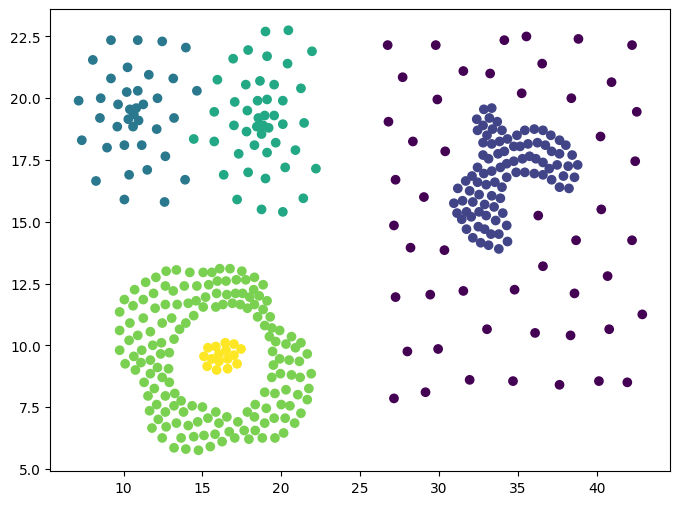

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df2[0], df2[1], c = df2[2])
# we conclude linear is bad

In [ ]:
X2, y2= df2[[0,1]], df2[2]

X2, y2 = shuffle_arrays_unison(arrays=[np.asarray(X2), np.asarray(y2).astype(int)], random_seed=42)

scaler = StandardScaler()
scaler.fit(X2)

X2 = scaler.transform(X2)
X_train2, y_train2 = X2[:100], y2[:100]
X_test2, y_test2 = X2[100:], y2[100:]

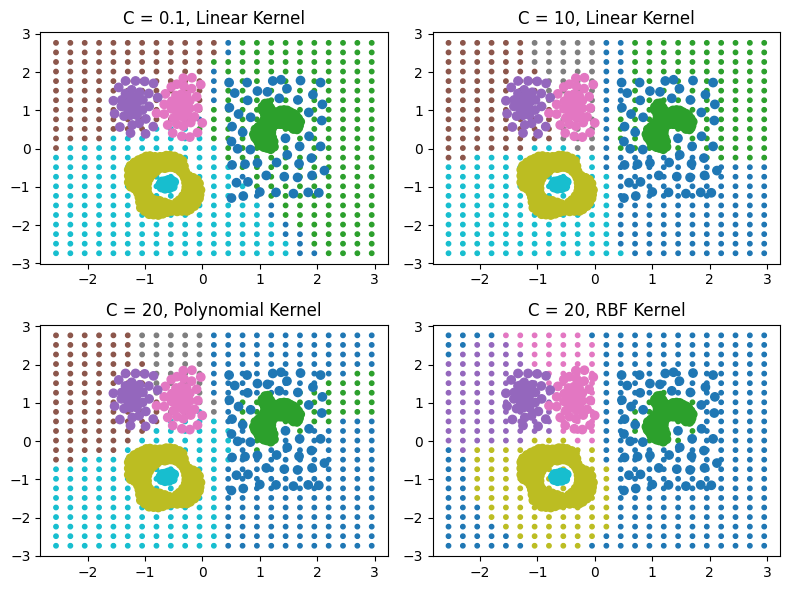

In [ ]:
# Define classifiers
clf1 = SVC(C=0.1, kernel='linear')
clf2 = SVC(C=10, kernel='linear')
clf3 = SVC(C=20, kernel='poly')
clf4 = SVC(C=20, kernel='rbf')

# Define labels
labels = ['C = 0.1, Linear Kernel', 'C = 10, Linear Kernel', 'C = 20, Polynomial Kernel', 'C = 20, RBF Kernel']

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(8, 6))

# Flatten the axs array for easier iteration
axs = axs.ravel()

for clf, lab, ax in zip([clf1, clf2, clf3, clf4], labels, axs):
    clf.fit(X_train2, y_train2)
    x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
    y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
    x_values, y_values = np.meshgrid(np.arange(x_min, x_max, 0.25),
                                     np.arange(y_min, y_max, 0.25))

    # Predict classes for each point in the meshgrid
    predicted_classes = clf.predict(np.c_[x_values.ravel(), y_values.ravel()])

    # Reshape the predicted classes to match the meshgrid shape
    predicted_classes = predicted_classes.reshape(x_values.shape)

    # Plot the meshgrid points with colors representing predicted classes
    ax.scatter(x_values, y_values, c=predicted_classes, s=10, cmap=plt.cm.tab10)

    # Plot original data points with class labels
    ax.scatter(X2[:, 0], X2[:, 1], c=y2, cmap=plt.cm.tab10)

    ax.set_title(lab)

plt.tight_layout()
plt.show()


In [ ]:
for clf in [clf1, clf2, clf3, clf4]:
  predictions2 = clf.predict(X_test2)
  print(f'The Accuracy of the {clf} classifier is', accuracy_score(predictions2, y_test2))
  # c=20   RBF kernel  is a good one

The Accuracy of the SVC(C=0.1, kernel='linear') classifier is 0.725752508361204
The Accuracy of the SVC(C=10, kernel='linear') classifier is 0.882943143812709
The Accuracy of the SVC(C=20, kernel='poly') classifier is 0.8862876254180602
The Accuracy of the SVC(C=20) classifier is 0.9765886287625418


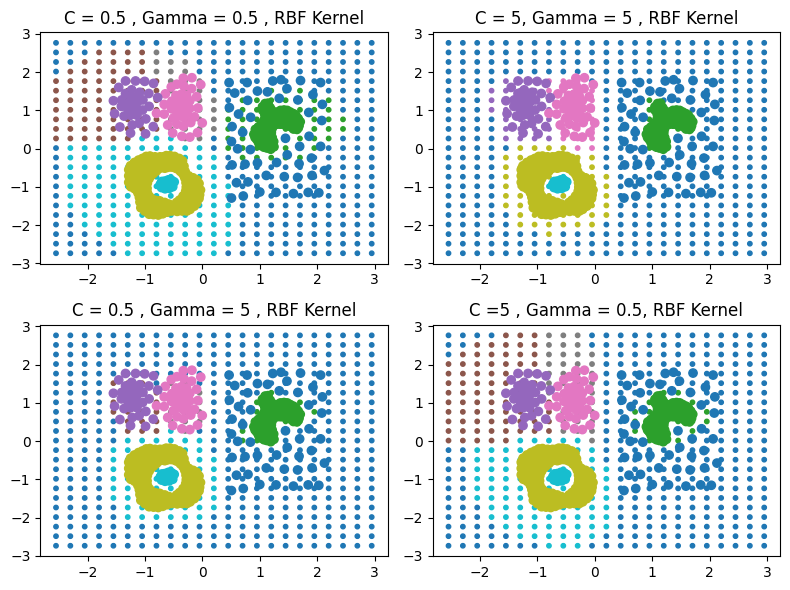

In [ ]:
clf1 = SVC(C=0.5, kernel='rbf', gamma = 0.5)
clf2 = SVC(C=5, kernel='rbf', gamma = 5)
clf3 = SVC(C=0.5, kernel='rbf', gamma = 5)
clf4 = SVC(C=5, kernel='rbf', gamma = 0.5)

labels = ['C = 0.5 , Gamma = 0.5 , RBF Kernel' , 'C = 5, Gamma = 5 , RBF Kernel', 'C = 0.5 , Gamma = 5 , RBF Kernel'  ,'C =5 , Gamma = 0.5, RBF Kernel']
# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(8, 6))

# Flatten the axs array for easier iteration
axs = axs.ravel()

for clf, lab, ax in zip([clf1, clf2, clf3, clf4], labels, axs):
    clf.fit(X_train2, y_train2)
    x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
    y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
    x_values, y_values = np.meshgrid(np.arange(x_min, x_max, 0.25),
                                     np.arange(y_min, y_max, 0.25))

    # Predict classes for each point in the meshgrid
    predicted_classes = clf.predict(np.c_[x_values.ravel(), y_values.ravel()])

    # Reshape the predicted classes to match the meshgrid shape
    predicted_classes = predicted_classes.reshape(x_values.shape)

    # Plot the meshgrid points with colors representing predicted classes
    ax.scatter(x_values, y_values, c=predicted_classes, s=10, cmap=plt.cm.tab10)

    # Plot original data points with class labels
    ax.scatter(X2[:, 0], X2[:, 1], c=y2, cmap=plt.cm.tab10)

    ax.set_title(lab)

plt.tight_layout()
plt.show()

In [ ]:
for clf in [clf1, clf2, clf3, clf4]:
  predictions2 = clf.predict(X_test2)                       #c=5 gamma=5  is the best   RBF kernel
  print(f'The Accuracy of the {clf} classifier is', accuracy_score(predictions2, y_test2))

The Accuracy of the SVC(C=0.5, gamma=0.5) classifier is 0.903010033444816
The Accuracy of the SVC(C=5, gamma=5) classifier is 0.979933110367893
The Accuracy of the SVC(C=0.5, gamma=5) classifier is 0.919732441471572
The Accuracy of the SVC(C=5, gamma=0.5) classifier is 0.9331103678929766


**FLAME**

In [ ]:
flam = "Flame.txt"
df3 = pd.read_csv(flam, sep='\t', skiprows=7, header=None)
df3

0      1  2
0    1.85  27.80  1
1    1.35  26.65  1
2    1.40  23.25  2
3    0.85  23.05  2
4    0.50  22.35  2
..    ...    ... ..
235  7.50  26.20  1
236  7.50  25.65  1
237  7.05  25.85  1
238  6.90  27.15  1
239  6.15  26.90  1

[240 rows x 3 columns]

In [ ]:
df3.shape

(240, 3)

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       240 non-null    float64
 1   1       240 non-null    float64
 2   2       240 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 5.8 KB


In [ ]:
df3.duplicated().sum()

0

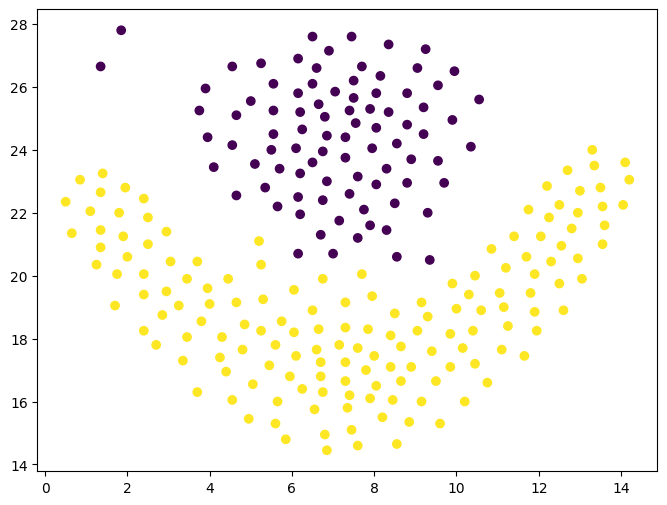

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df3[0], df3[1], c = df3[2])                   #not linear

In [ ]:
X3, y3= df3[[0,1]], df3[2]

X3, y3 = shuffle_arrays_unison(arrays=[np.asarray(X3), np.asarray(y3).astype(int)], random_seed=42)

scaler = StandardScaler()
scaler.fit(X3)

X3 = scaler.transform(X3)
X_train3, y_train3 = X3[:100], y3[:100]
X_test3, y_test3 = X3[100:], y3[100:]

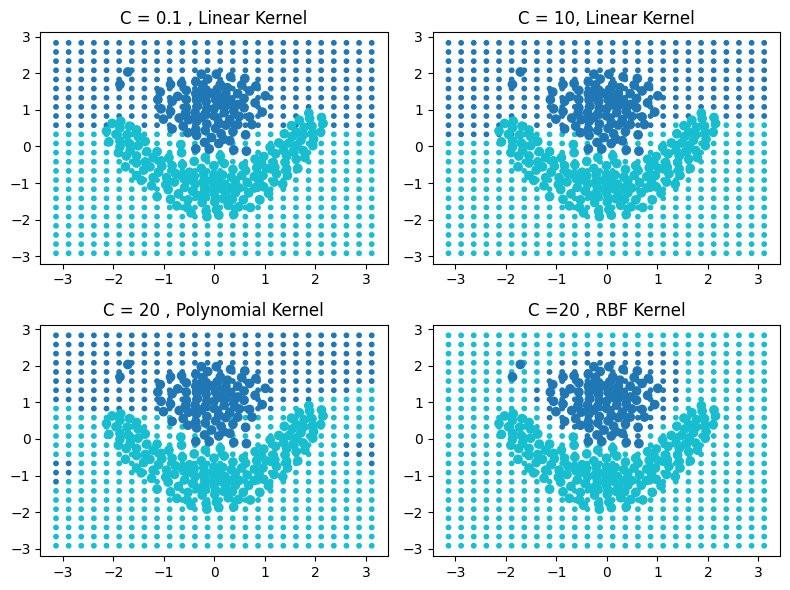

In [ ]:
clf1 = SVC(C=0.1, kernel='linear')
clf2 = SVC(C=10, kernel='linear')
clf3 = SVC(C=20, kernel='poly')
clf4 = SVC(C=20, kernel='rbf')

labels = ['C = 0.1 , Linear Kernel' , 'C = 10, Linear Kernel', 'C = 20 , Polynomial Kernel'  ,'C =20 , RBF Kernel']
# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(8, 6))

# Flatten the axs array for easier iteration
axs = axs.ravel()

for clf, lab, ax in zip([clf1, clf2, clf3, clf4], labels, axs):
    clf.fit(X_train3, y_train3)
    x_min, x_max = X3[:, 0].min() - 1, X3[:, 0].max() + 1
    y_min, y_max = X3[:, 1].min() - 1, X3[:, 1].max() + 1
    x_values, y_values = np.meshgrid(np.arange(x_min, x_max, 0.25),
                                     np.arange(y_min, y_max, 0.25))

    # Predict classes for each point in the meshgrid
    predicted_classes = clf.predict(np.c_[x_values.ravel(), y_values.ravel()])

    # Reshape the predicted classes to match the meshgrid shape
    predicted_classes = predicted_classes.reshape(x_values.shape)

    # Plot the meshgrid points with colors representing predicted classes
    ax.scatter(x_values, y_values, c=predicted_classes, s=10, cmap=plt.cm.tab10)

    # Plot original data points with class labels
    ax.scatter(X3[:, 0], X3[:, 1], c=y3, cmap=plt.cm.tab10)

    ax.set_title(lab)

plt.tight_layout()
plt.show()

In [ ]:
for clf in [clf1, clf2, clf3, clf4]:
  predictions3 = clf.predict(X_test3)
  print(f'The Accuracy of the {clf} classifier is', accuracy_score(predictions3, y_test3))
  # we conclude c=20   and RBF is a good kernel

The Accuracy of the SVC(C=0.1, kernel='linear') classifier is 0.8785714285714286
The Accuracy of the SVC(C=10, kernel='linear') classifier is 0.8857142857142857
The Accuracy of the SVC(C=20, kernel='poly') classifier is 0.9142857142857143
The Accuracy of the SVC(C=20) classifier is 0.9714285714285714


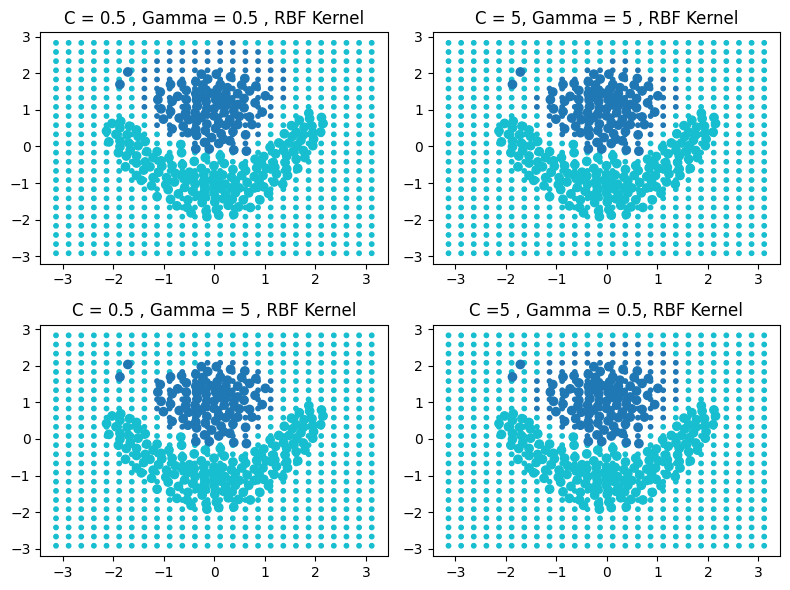

In [ ]:
clf1 = SVC(C=0.5, kernel='rbf', gamma = 0.5)
clf2 = SVC(C=5, kernel='rbf', gamma = 5)
clf3 = SVC(C=0.5, kernel='rbf', gamma = 5)
clf4 = SVC(C=5, kernel='rbf', gamma = 0.5)

labels = ['C = 0.5 , Gamma = 0.5 , RBF Kernel' , 'C = 5, Gamma = 5 , RBF Kernel', 'C = 0.5 , Gamma = 5 , RBF Kernel'  ,'C =5 , Gamma = 0.5, RBF Kernel']
# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(8, 6))

# Flatten the axs array for easier iteration
axs = axs.ravel()

for clf, lab, ax in zip([clf1, clf2, clf3, clf4], labels, axs):
    clf.fit(X_train3, y_train3)
    x_min, x_max = X3[:, 0].min() - 1, X3[:, 0].max() + 1
    y_min, y_max = X3[:, 1].min() - 1, X3[:, 1].max() + 1
    x_values, y_values = np.meshgrid(np.arange(x_min, x_max, 0.25),
                                     np.arange(y_min, y_max, 0.25))

    # Predict classes for each point in the meshgrid
    predicted_classes = clf.predict(np.c_[x_values.ravel(), y_values.ravel()])

    # Reshape the predicted classes to match the meshgrid shape
    predicted_classes = predicted_classes.reshape(x_values.shape)

    # Plot the meshgrid points with colors representing predicted classes
    ax.scatter(x_values, y_values, c=predicted_classes, s=10, cmap=plt.cm.tab10)

    # Plot original data points with class labels
    ax.scatter(X3[:, 0], X3[:, 1], c=y3, cmap=plt.cm.tab10)

    ax.set_title(lab)

plt.tight_layout()
plt.show()

In [ ]:
for clf in [clf1, clf2, clf3, clf4]:
  predictions3 = clf.predict(X_test3)
  print(f'The Accuracy of the {clf} classifier is', accuracy_score(predictions3, y_test3))          #  all classifier here are perfect using RBf kernel

The Accuracy of the SVC(C=0.5, gamma=0.5) classifier is 0.9714285714285714
The Accuracy of the SVC(C=5, gamma=5) classifier is 0.9714285714285714
The Accuracy of the SVC(C=0.5, gamma=5) classifier is 0.9714285714285714
The Accuracy of the SVC(C=5, gamma=0.5) classifier is 0.9714285714285714


**JAIN**

In [ ]:
jain = "Jain.txt"
df4 = pd.read_csv(jain, sep='\t', skiprows=7, header=None)
df4

0      1  2
0     0.85  17.45  2
1     0.75  15.60  2
2     3.30  15.45  2
3     5.25  14.20  2
4     4.90  15.65  2
..     ...    ... ..
368  38.75  16.85  1
369  39.00  16.60  1
370  38.25  17.35  1
371  39.50  16.95  1
372  39.90  17.05  1

[373 rows x 3 columns]

In [ ]:
df4.shape

(373, 3)

In [ ]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       373 non-null    float64
 1   1       373 non-null    float64
 2   2       373 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 8.9 KB


In [ ]:
df4.duplicated().sum()

0

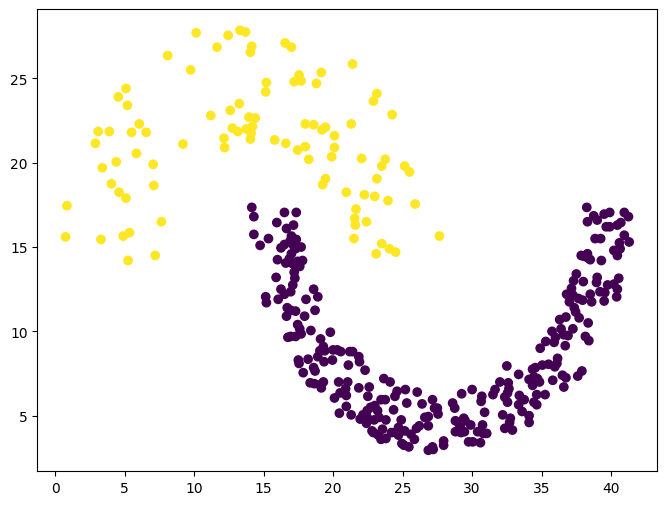

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df4[0], df4[1], c = df4[2])                   #not linear

In [ ]:
X4, y4= df4[[0,1]], df4[2]

X4, y4 = shuffle_arrays_unison(arrays=[np.asarray(X4), np.asarray(y4).astype(int)], random_seed=42)

scaler = StandardScaler()
scaler.fit(X4)

X4 = scaler.transform(X4)
X_train4, y_train4 = X4[:100], y4[:100]
X_test4, y_test4 = X4[100:], y4[100:]

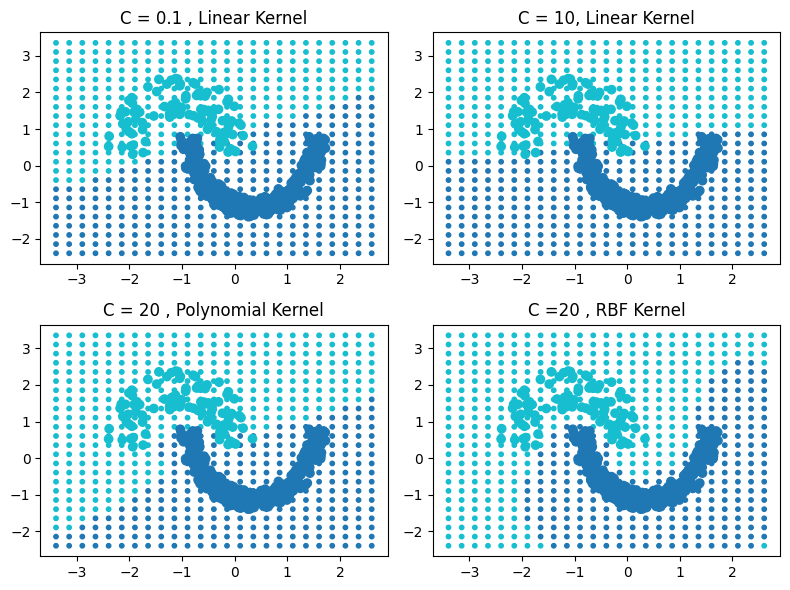

In [ ]:
clf1 = SVC(C=0.1, kernel='linear')
clf2 = SVC(C=10, kernel='linear')
clf3 = SVC(C=20, kernel='poly')
clf4 = SVC(C=20, kernel='rbf')

labels = ['C = 0.1 , Linear Kernel' , 'C = 10, Linear Kernel', 'C = 20 , Polynomial Kernel'  ,'C =20 , RBF Kernel']
# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(8, 6))

# Flatten the axs array for easier iteration
axs = axs.ravel()

for clf, lab, ax in zip([clf1, clf2, clf3, clf4], labels, axs):
    clf.fit(X_train4, y_train4)
    x_min, x_max = X4[:, 0].min() - 1, X4[:, 0].max() + 1
    y_min, y_max = X4[:, 1].min() - 1, X4[:, 1].max() + 1
    x_values, y_values = np.meshgrid(np.arange(x_min, x_max, 0.25),
                                     np.arange(y_min, y_max, 0.25))

    # Predict classes for each point in the meshgrid
    predicted_classes = clf.predict(np.c_[x_values.ravel(), y_values.ravel()])

    # Reshape the predicted classes to match the meshgrid shape
    predicted_classes = predicted_classes.reshape(x_values.shape)

    # Plot the meshgrid points with colors representing predicted classes
    ax.scatter(x_values, y_values, c=predicted_classes, s=10, cmap=plt.cm.tab10)

    # Plot original data points with class labels
    ax.scatter(X4[:, 0], X4[:, 1], c=y4, cmap=plt.cm.tab10)

    ax.set_title(lab)

plt.tight_layout()
plt.show()


In [ ]:
for clf in [clf1, clf2, clf3, clf4]:
  predictions4 = clf.predict(X_test4)
  print(f'The Accuracy of the {clf} classifier is', accuracy_score(predictions4, y_test4))
# we conclude c=20         RBF kernel is a perfect classifier

The Accuracy of the SVC(C=0.1, kernel='linear') classifier is 0.9413919413919414
The Accuracy of the SVC(C=10, kernel='linear') classifier is 0.9523809523809523
The Accuracy of the SVC(C=20, kernel='poly') classifier is 0.9743589743589743
The Accuracy of the SVC(C=20) classifier is 1.0


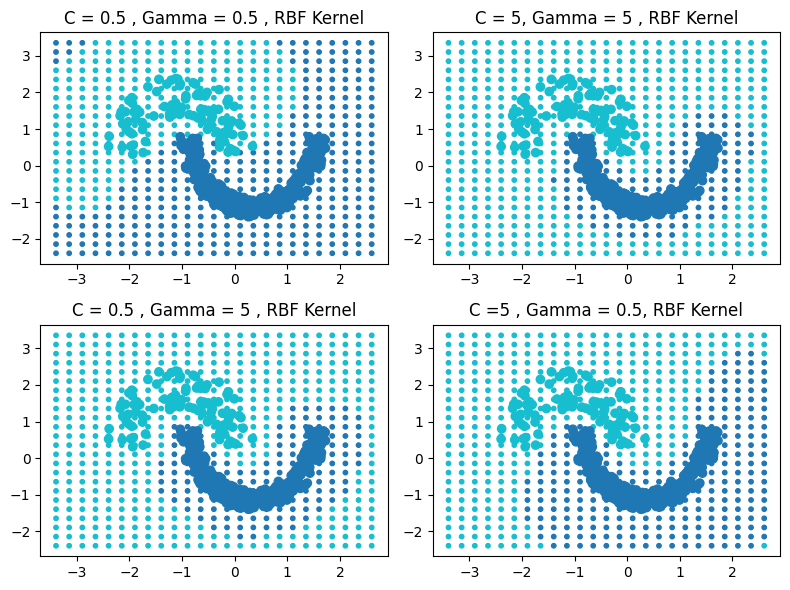

In [ ]:
clf1 = SVC(C=0.5, kernel='rbf', gamma = 0.5)
clf2 = SVC(C=5, kernel='rbf', gamma = 5)
clf3 = SVC(C=0.5, kernel='rbf', gamma = 5)
clf4 = SVC(C=5, kernel='rbf', gamma = 0.5)

labels = ['C = 0.5 , Gamma = 0.5 , RBF Kernel' , 'C = 5, Gamma = 5 , RBF Kernel', 'C = 0.5 , Gamma = 5 , RBF Kernel'  ,'C =5 , Gamma = 0.5, RBF Kernel']
# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(8, 6))

# Flatten the axs array for easier iteration
axs = axs.ravel()

for clf, lab, ax in zip([clf1, clf2, clf3, clf4], labels, axs):
    clf.fit(X_train4, y_train4)
    x_min, x_max = X4[:, 0].min() - 1, X4[:, 0].max() + 1
    y_min, y_max = X4[:, 1].min() - 1, X4[:, 1].max() + 1
    x_values, y_values = np.meshgrid(np.arange(x_min, x_max, 0.25),
                                     np.arange(y_min, y_max, 0.25))

    # Predict classes for each point in the meshgrid
    predicted_classes = clf.predict(np.c_[x_values.ravel(), y_values.ravel()])

    # Reshape the predicted classes to match the meshgrid shape
    predicted_classes = predicted_classes.reshape(x_values.shape)

    # Plot the meshgrid points with colors representing predicted classes
    ax.scatter(x_values, y_values, c=predicted_classes, s=10, cmap=plt.cm.tab10)

    # Plot original data points with class labels
    ax.scatter(X4[:, 0], X4[:, 1], c=y4, cmap=plt.cm.tab10)

    ax.set_title(lab)

plt.tight_layout()
plt.show()

In [ ]:
for clf in [clf1, clf2, clf3, clf4]:
  predictions4 = clf.predict(X_test4)
  print(f'The Accuracy of the {clf} classifier is', accuracy_score(predictions4, y_test4))
# we conclude also c=5,0.5,5    gamma=5,5,0.5   RBF kernels are the best

The Accuracy of the SVC(C=0.5, gamma=0.5) classifier is 0.978021978021978
The Accuracy of the SVC(C=5, gamma=5) classifier is 1.0
The Accuracy of the SVC(C=0.5, gamma=5) classifier is 1.0
The Accuracy of the SVC(C=5, gamma=0.5) classifier is 1.0


**PATHBASED**

In [ ]:
pathbased= "Pathbased.txt"
df5 = pd.read_csv(pathbased, sep='\t', skiprows=7, header=None)
df5

0      1  2
0    11.25   5.05  1
1    10.95   4.70  1
2     9.85   5.80  1
3     9.80   5.75  1
4     9.15   6.80  1
..     ...    ... ..
295  17.50  18.05  2
296  16.65  17.50  2
297  15.45  17.30  2
298  15.45  17.80  2
299  15.70  18.40  2

[300 rows x 3 columns]

In [ ]:
df5.shape

(300, 3)

In [ ]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       300 non-null    float64
 1   1       300 non-null    float64
 2   2       300 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 7.2 KB


In [ ]:
df5.duplicated().sum()

1

In [ ]:
df5=df5.drop_duplicates()
df5.duplicated().sum()

0

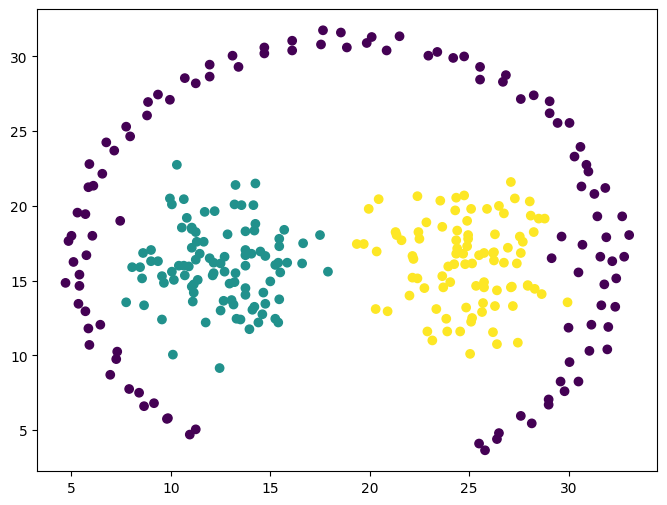

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df5[0], df5[1], c = df5[2])                   #not linear

In [ ]:
X5, y5= df5[[0,1]], df5[2]

X5, y5 = shuffle_arrays_unison(arrays=[np.asarray(X5), np.asarray(y5).astype(int)], random_seed=42)

scaler = StandardScaler()
scaler.fit(X5)

X5 = scaler.transform(X5)
X_train5, y_train5 = X5[:100], y5[:100]
X_test5, y_test5 = X5[100:], y5[100:]

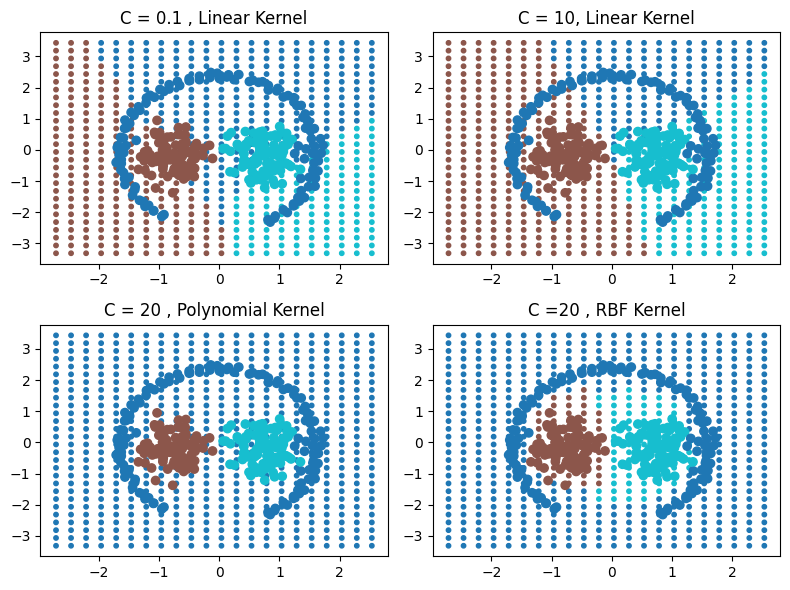

In [ ]:
clf1 = SVC(C=0.1, kernel='linear')
clf2 = SVC(C=10, kernel='linear')
clf3 = SVC(C=20, kernel='poly')
clf4 = SVC(C=20, kernel='rbf')

labels = ['C = 0.1 , Linear Kernel' , 'C = 10, Linear Kernel', 'C = 20 , Polynomial Kernel'  ,'C =20 , RBF Kernel']
# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(8, 6))

# Flatten the axs array for easier iteration
axs = axs.ravel()

for clf, lab, ax in zip([clf1, clf2, clf3, clf4], labels, axs):
    clf.fit(X_train5, y_train5)
    x_min, x_max = X5[:, 0].min() - 1, X5[:, 0].max() + 1
    y_min, y_max = X5[:, 1].min() - 1, X5[:, 1].max() + 1
    x_values, y_values = np.meshgrid(np.arange(x_min, x_max, 0.25),
                                     np.arange(y_min, y_max, 0.25))

    # Predict classes for each point in the meshgrid
    predicted_classes = clf.predict(np.c_[x_values.ravel(), y_values.ravel()])

    # Reshape the predicted classes to match the meshgrid shape
    predicted_classes = predicted_classes.reshape(x_values.shape)

    # Plot the meshgrid points with colors representing predicted classes
    ax.scatter(x_values, y_values, c=predicted_classes, s=10, cmap=plt.cm.tab10)

    # Plot original data points with class labels
    ax.scatter(X5[:, 0], X5[:, 1], c=y5, cmap=plt.cm.tab10)

    ax.set_title(lab)

plt.tight_layout()
plt.show()

In [ ]:
for clf in [clf1, clf2, clf3, clf4]:
  predictions5 = clf.predict(X_test5)
  print(f'The Accuracy of the {clf} classifier is', accuracy_score(predictions5, y_test5))
# c=20   RBF kernel is good classifier

The Accuracy of the SVC(C=0.1, kernel='linear') classifier is 0.32663316582914576
The Accuracy of the SVC(C=10, kernel='linear') classifier is 0.6984924623115578
The Accuracy of the SVC(C=20, kernel='poly') classifier is 0.33668341708542715
The Accuracy of the SVC(C=20) classifier is 0.9849246231155779


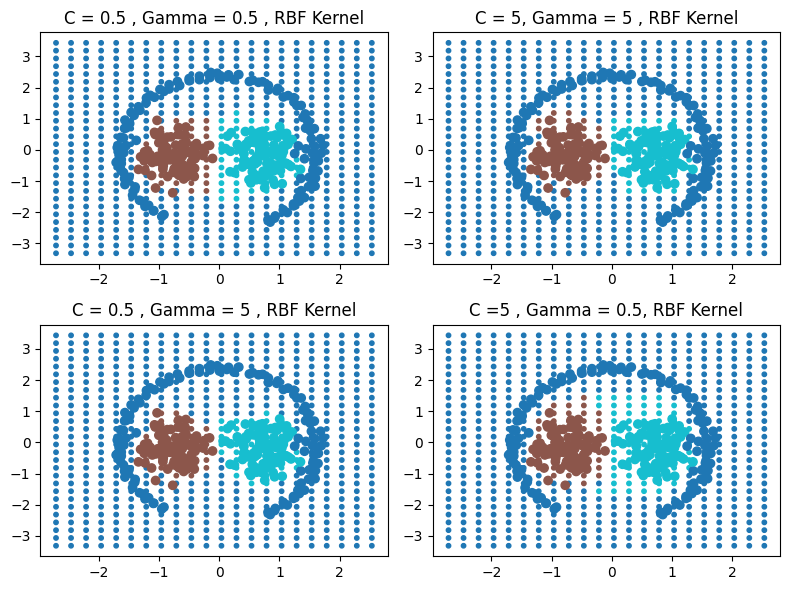

In [ ]:
clf1 = SVC(C=0.5, kernel='rbf', gamma = 0.5)
clf2 = SVC(C=5, kernel='rbf', gamma = 5)
clf3 = SVC(C=0.5, kernel='rbf', gamma = 5)
clf4 = SVC(C=5, kernel='rbf', gamma = 0.5)

labels = ['C = 0.5 , Gamma = 0.5 , RBF Kernel' , 'C = 5, Gamma = 5 , RBF Kernel', 'C = 0.5 , Gamma = 5 , RBF Kernel'  ,'C =5 , Gamma = 0.5, RBF Kernel']
# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(8, 6))

# Flatten the axs array for easier iteration
axs = axs.ravel()

for clf, lab, ax in zip([clf1, clf2, clf3, clf4], labels, axs):
    clf.fit(X_train5, y_train5)
    x_min, x_max = X5[:, 0].min() - 1, X5[:, 0].max() + 1
    y_min, y_max = X5[:, 1].min() - 1, X5[:, 1].max() + 1
    x_values, y_values = np.meshgrid(np.arange(x_min, x_max, 0.25),
                                     np.arange(y_min, y_max, 0.25))

    # Predict classes for each point in the meshgrid
    predicted_classes = clf.predict(np.c_[x_values.ravel(), y_values.ravel()])

    # Reshape the predicted classes to match the meshgrid shape
    predicted_classes = predicted_classes.reshape(x_values.shape)

    # Plot the meshgrid points with colors representing predicted classes
    ax.scatter(x_values, y_values, c=predicted_classes, s=10, cmap=plt.cm.tab10)

    # Plot original data points with class labels
    ax.scatter(X5[:, 0], X5[:, 1], c=y5, cmap=plt.cm.tab10)

    ax.set_title(lab)

plt.tight_layout()
plt.show()

In [ ]:
for clf in [clf1, clf2, clf3, clf4]:
  predictions5 = clf.predict(X_test5)
  print(f'The Accuracy of the {clf} classifier is', accuracy_score(predictions5, y_test5))
# all of these classifier are good ones

The Accuracy of the SVC(C=0.5, gamma=0.5) classifier is 0.9798994974874372
The Accuracy of the SVC(C=5, gamma=5) classifier is 0.9698492462311558
The Accuracy of the SVC(C=0.5, gamma=5) classifier is 0.9698492462311558
The Accuracy of the SVC(C=5, gamma=0.5) classifier is 0.9748743718592965


**SPIRAL**

In [ ]:
spiral= "Spiral.txt"
df6 = pd.read_csv(spiral, sep='\t', skiprows=7, header=None)
df6

0      1  2
0    31.95   7.95  3
1    31.15   7.30  3
2    30.45   6.65  3
3    29.70   6.00  3
4    28.90   5.55  3
..     ...    ... ..
307  15.75  13.85  2
308  15.65  14.05  2
309  15.65  14.25  2
310  15.65  14.50  2
311  15.65  14.60  2

[312 rows x 3 columns]

In [ ]:
df6.shape

(312, 3)

In [ ]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       312 non-null    float64
 1   1       312 non-null    float64
 2   2       312 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 7.4 KB


In [ ]:
df6.duplicated().sum()

0

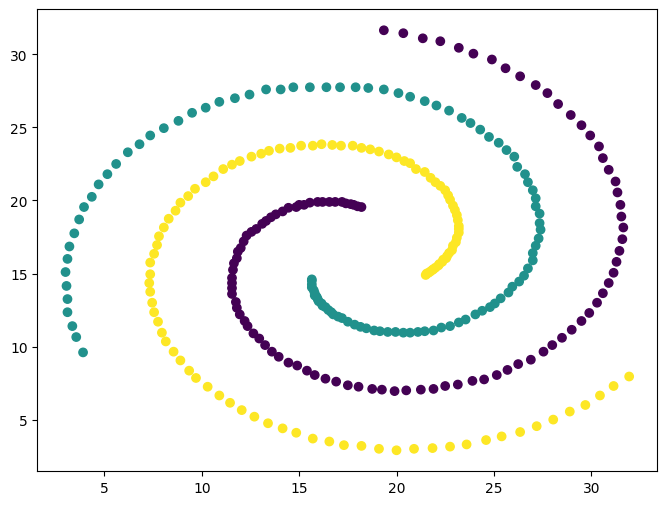

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df6[0], df6[1], c = df6[2])                   #not linear

In [ ]:
X6, y6= df6[[0,1]], df6[2]

X6, y6 = shuffle_arrays_unison(arrays=[np.asarray(X6), np.asarray(y6).astype(int)], random_seed=42)

scaler = StandardScaler()
scaler.fit(X6)

X6 = scaler.transform(X6)
X_train6, y_train6 = X6[:100], y6[:100]
X_test6, y_test6 = X6[100:], y6[100:]

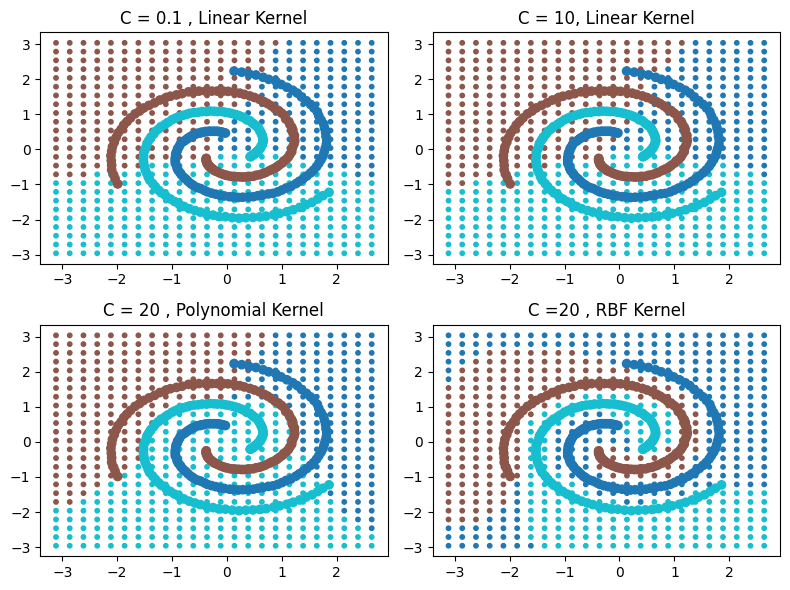

In [ ]:
clf1 = SVC(C=0.1, kernel='linear')
clf2 = SVC(C=10, kernel='linear')
clf3 = SVC(C=20, kernel='poly')
clf4 = SVC(C=20, kernel='rbf')

labels = ['C = 0.1 , Linear Kernel' , 'C = 10, Linear Kernel', 'C = 20 , Polynomial Kernel'  ,'C =20 , RBF Kernel']
# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(8, 6))

# Flatten the axs array for easier iteration
axs = axs.ravel()

for clf, lab, ax in zip([clf1, clf2, clf3, clf4], labels, axs):
    clf.fit(X_train6, y_train6)
    x_min, x_max = X6[:, 0].min() - 1, X6[:, 0].max() + 1
    y_min, y_max = X6[:, 1].min() - 1, X6[:, 1].max() + 1
    x_values, y_values = np.meshgrid(np.arange(x_min, x_max, 0.25),
                                     np.arange(y_min, y_max, 0.25))

    # Predict classes for each point in the meshgrid
    predicted_classes = clf.predict(np.c_[x_values.ravel(), y_values.ravel()])

    # Reshape the predicted classes to match the meshgrid shape
    predicted_classes = predicted_classes.reshape(x_values.shape)

    # Plot the meshgrid points with colors representing predicted classes
    ax.scatter(x_values, y_values, c=predicted_classes, s=10, cmap=plt.cm.tab10)

    # Plot original data points with class labels
    ax.scatter(X6[:, 0], X6[:, 1], c=y6, cmap=plt.cm.tab10)

    ax.set_title(lab)

plt.tight_layout()
plt.show()

In [ ]:
for clf in [clf1, clf2, clf3, clf4]:
  predictions6 = clf.predict(X_test6)
  print(f'The Accuracy of the {clf} classifier is', accuracy_score(predictions6, y_test6))
# we conclude c=20  RBF kernel is a perfect classifier

The Accuracy of the SVC(C=0.1, kernel='linear') classifier is 0.36792452830188677
The Accuracy of the SVC(C=10, kernel='linear') classifier is 0.3443396226415094
The Accuracy of the SVC(C=20, kernel='poly') classifier is 0.49528301886792453
The Accuracy of the SVC(C=20) classifier is 0.9952830188679245


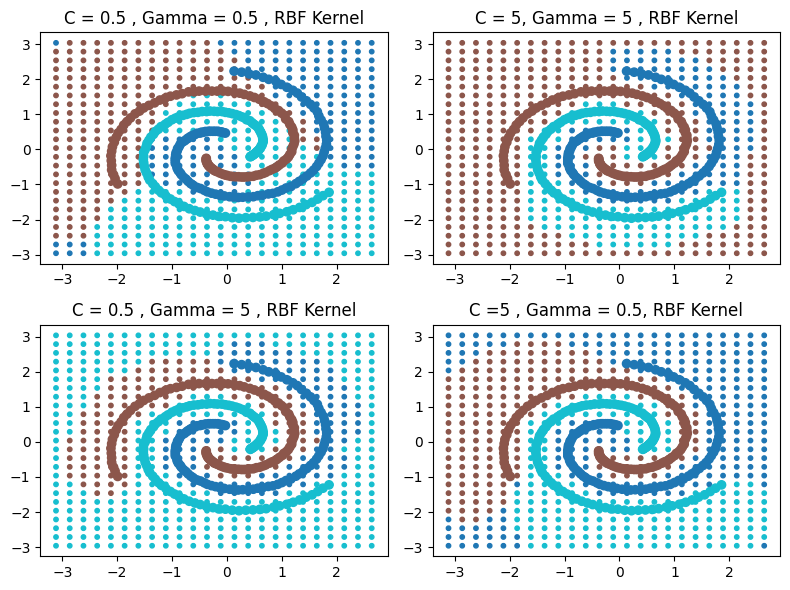

In [ ]:
clf1 = SVC(C=0.5, kernel='rbf', gamma = 0.5)
clf2 = SVC(C=5, kernel='rbf', gamma = 5)
clf3 = SVC(C=0.5, kernel='rbf', gamma = 5)
clf4 = SVC(C=5, kernel='rbf', gamma = 0.5)

labels = ['C = 0.5 , Gamma = 0.5 , RBF Kernel' , 'C = 5, Gamma = 5 , RBF Kernel', 'C = 0.5 , Gamma = 5 , RBF Kernel'  ,'C =5 , Gamma = 0.5, RBF Kernel']
# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(8, 6))

# Flatten the axs array for easier iteration
axs = axs.ravel()

for clf, lab, ax in zip([clf1, clf2, clf3, clf4], labels, axs):
    clf.fit(X_train6, y_train6)
    x_min, x_max = X6[:, 0].min() - 1, X6[:, 0].max() + 1
    y_min, y_max = X6[:, 1].min() - 1, X6[:, 1].max() + 1
    x_values, y_values = np.meshgrid(np.arange(x_min, x_max, 0.25),
                                     np.arange(y_min, y_max, 0.25))

    # Predict classes for each point in the meshgrid
    predicted_classes = clf.predict(np.c_[x_values.ravel(), y_values.ravel()])

    # Reshape the predicted classes to match the meshgrid shape
    predicted_classes = predicted_classes.reshape(x_values.shape)

    # Plot the meshgrid points with colors representing predicted classes
    ax.scatter(x_values, y_values, c=predicted_classes, s=10, cmap=plt.cm.tab10)

    # Plot original data points with class labels
    ax.scatter(X6[:, 0], X6[:, 1], c=y6, cmap=plt.cm.tab10)

    ax.set_title(lab)

plt.tight_layout()
plt.show()

In [ ]:
for clf in [clf1, clf2, clf3, clf4]:
  predictions6 = clf.predict(X_test6)
  print(f'The Accuracy of the {clf} classifier is', accuracy_score(predictions6, y_test6))
#we coclude all of them are a good clssifier except SVC(C=0.5, gamma=0.5) classifier

The Accuracy of the SVC(C=0.5, gamma=0.5) classifier is 0.6084905660377359
The Accuracy of the SVC(C=5, gamma=5) classifier is 1.0
The Accuracy of the SVC(C=0.5, gamma=5) classifier is 0.9952830188679245
The Accuracy of the SVC(C=5, gamma=0.5) classifier is 1.0
